In [1]:
import tensorflow as tf
import keras.preprocessing.image as kpi
from matplotlib import pyplot as plt
import os
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import h5py

Using TensorFlow backend.


In [2]:
datadear = "/Users/toufikcheikh/Desktop/M2MSS/BigData"
data = pd.read_hdf(datadear+"/train.hdf5")
validation = pd.read_hdf(datadear+"/validation.hdf5")


In [3]:
data


,0,1,2,3,4,5,6,7,8,9,...,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439
0,0.041259,0.041259,0.032573,0.023887,0.029315,0.041259,0.045602,0.038001,0.030401,0.032573,...,0.034744,-0.007600,-0.003257,0.065145,0.047773,-0.009772,0.031487,0.096632,0.077089,0.040173
1,-0.211722,-0.264924,-0.274696,-0.236694,-0.156349,-0.059716,0.005429,0.046687,0.153091,0.281210,...,0.260581,-0.004343,-0.241037,-0.636252,-0.953292,-0.980436,-0.846888,-0.838202,-0.880546,-0.739398
2,0.214105,0.154930,0.136640,0.013987,-0.038733,-0.015063,-0.111894,-0.104363,0.047340,-0.054871,...,0.040884,0.375490,0.699337,0.965085,1.086662,1.132926,1.279249,1.296464,0.937112,0.451879
3,-0.154837,-0.127768,-0.217638,-0.284770,-0.299929,-0.270694,-0.077960,0.092036,0.076877,0.154837,...,-0.286936,-0.171079,-0.036814,-0.024904,0.031400,0.140761,-0.011911,-0.173244,-0.063884,0.081208
4,-1.022780,-0.916376,-0.676425,-0.461445,-0.330069,-0.122690,0.178064,0.489675,0.799115,0.931577,...,1.009751,1.134613,0.836030,0.479903,0.109661,-0.285553,-0.628651,-0.916376,-1.010837,-0.804544
5,0.802624,0.759588,0.554090,0.391629,0.183979,0.013987,-0.232395,-0.563773,-0.632631,-0.528269,...,-0.741297,-0.499219,-0.192587,0.018290,-0.008607,0.031201,0.272204,0.654149,0.971541,0.931732
6,-0.334578,-0.232797,-0.126685,-0.184072,-0.047642,0.138595,0.263114,0.351902,0.316170,0.273942,...,0.007579,0.273942,0.425531,0.064967,-0.225217,-0.387634,-0.528395,-0.570623,-0.526229,-0.372475
7,0.042344,0.039087,0.038001,0.067317,0.053202,-0.024972,-0.023887,0.069488,0.064059,-0.040173,...,0.203036,0.404986,0.653624,0.746999,0.555906,0.262752,0.225837,0.262752,0.161777,0.003257
8,0.004304,0.019366,-0.087148,-0.044112,0.145247,0.094679,-0.114046,-0.022594,0.173220,0.057023,...,-0.761740,-0.990907,-1.050082,-1.030715,-1.016729,-1.059765,-0.782182,-0.281887,0.041960,0.221636
9,0.017324,0.023821,0.176492,0.108278,-0.092036,0.003248,0.180824,0.016242,-0.144009,0.030318,...,-0.088788,-0.160251,-0.124519,-0.140761,-0.173244,-0.016242,-0.066049,-0.296681,-0.304260,-0.009745


In [4]:
validation

,0,1,2,3,4,5,6,7,8,9,...,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439
0,0.070650,0.085524,0.076847,0.085524,0.120229,0.140061,0.107834,0.048340,0.014874,0.030987,...,0.018592,-0.017353,-0.049579,-0.061974,-0.022311,0.052058,0.091721,0.075608,0.045861,0.027268
1,-0.300685,-0.882656,-1.733789,-2.181179,-1.942328,-1.719240,-1.981126,-2.323034,-2.325459,-2.349708,...,0.454665,-0.782024,-1.725302,-1.829572,-1.170004,-0.278861,-0.152767,-1.035424,-2.312123,-3.199628
2,-0.056398,-0.152028,-0.058850,0.140994,0.170419,0.154480,0.270954,0.359228,0.334708,0.349420,...,0.023295,-0.019617,-0.062528,-0.094405,-0.105439,-0.123830,-0.166741,-0.159385,-0.106665,-0.131186
3,0.030618,0.020412,0.058747,0.124712,0.155828,0.161553,0.167777,0.170515,0.165038,0.141141,...,-0.073682,-0.052524,-0.023897,-0.009210,0.016429,0.058000,0.097828,0.114755,0.090360,0.054764
4,-1.071597,-6.912540,-13.677612,-16.463519,-15.790084,-11.653620,-7.668311,-9.942997,-14.321553,-13.704648,...,-5.227723,-6.107613,-6.577051,-6.123589,-5.324806,-4.965969,-4.464579,-3.442138,-3.794831,-6.133420
5,-0.106524,0.129788,0.677099,1.311344,1.306447,0.493438,-0.353855,-0.494662,-0.194681,0.006122,...,-1.497455,-0.877903,0.247331,1.433785,1.881920,1.730093,1.181557,0.019591,-1.065238,-1.054218
6,0.075292,0.138441,0.196732,0.242879,0.269595,0.272024,0.252594,0.211304,0.165158,0.134798,...,-0.212519,-0.197946,-0.202804,-0.204018,-0.172444,-0.121439,-0.093508,-0.078936,-0.041289,0.017002
7,0.588939,0.379130,-0.414711,-1.120211,-1.498114,-1.271127,-0.652741,-0.376676,-0.007362,0.053986,...,0.790160,0.622067,-0.197540,0.026993,0.349683,-0.004908,0.078525,0.269930,-0.087114,0.252753
8,-8.059100,-6.846179,-3.552738,-2.357022,-3.582232,-3.882082,-3.342597,-4.637853,-7.660937,-9.410885,...,0.087252,0.705386,0.956081,0.218743,-1.472217,-2.887905,-2.934604,-1.761008,-0.726278,-0.974514
9,-0.395080,-0.352137,-0.406123,-0.406123,-0.357044,-0.224533,0.063802,0.168093,0.175455,0.236803,...,-0.074844,-0.009816,0.050305,0.100610,0.062575,0.000000,0.123923,0.213490,0.098157,-0.067483


In [5]:
#test de la normalité des données avec comme sortie la statistique de test ainsi que la p-valeur 
# H0 :"les données sont normalement distribuées"
from scipy.stats import shapiro
shapiro(data[[1]])
# la p-valeur < 0.05 on rejette donc H0 

(0.8600556254386902, 3.157231535233144e-36)

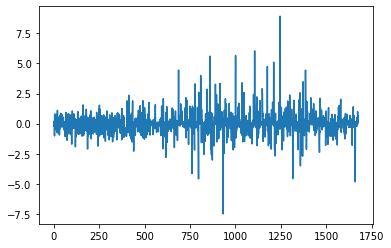

In [6]:
plt.plot(data[[0]])

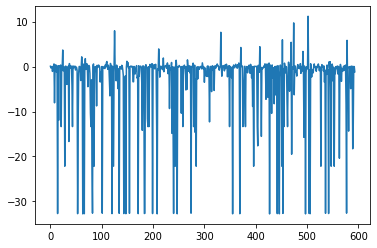

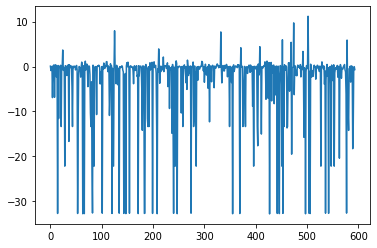

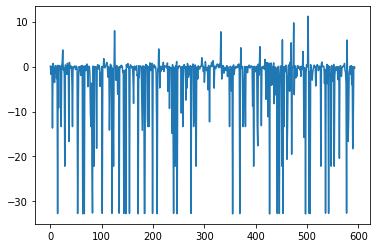

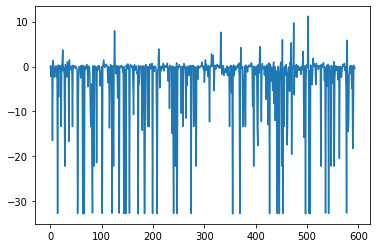

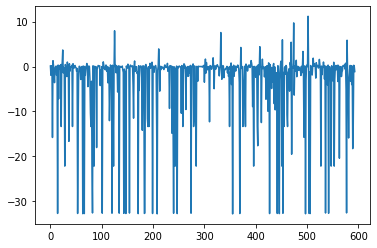

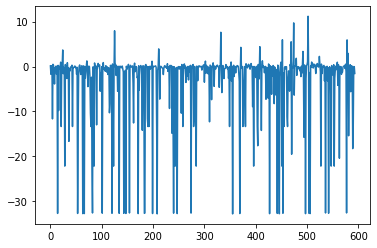

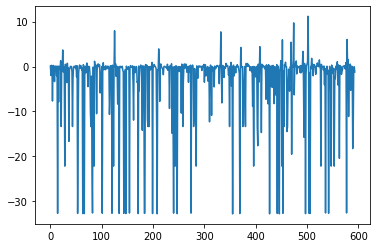

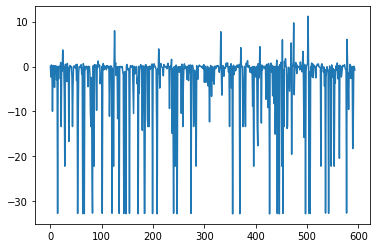

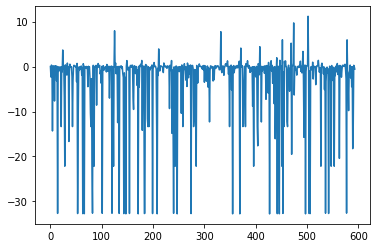

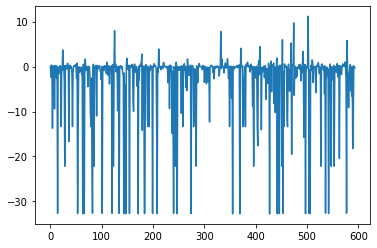

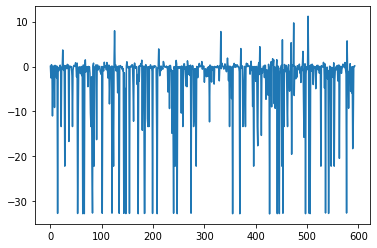

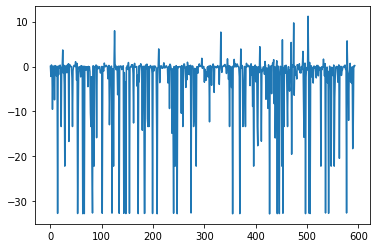

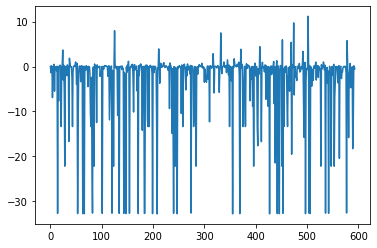

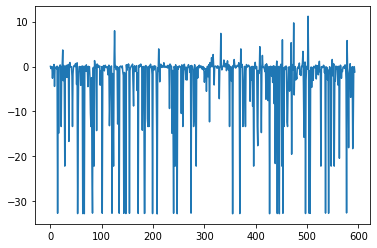

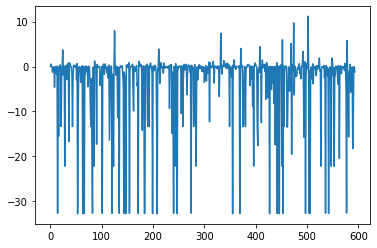

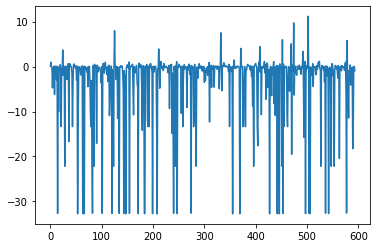

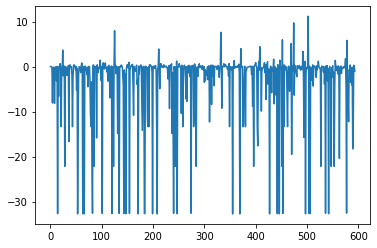

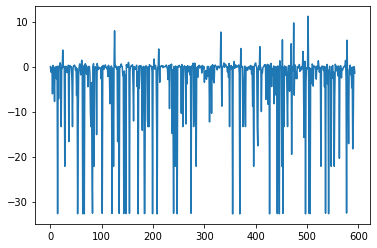

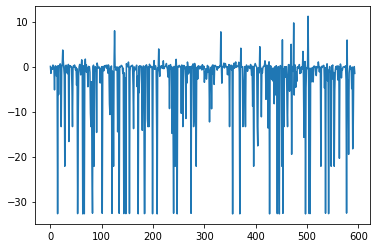

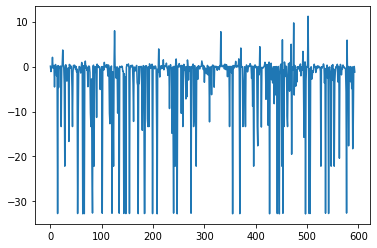

In [7]:
for i in range(0,20):
    plt.subplots()
    plt.plot(validation[[i]])

In [15]:
data.shape

(1677, 61440)

In [12]:
# Définition de la commande
pca = PCA()

# Composantes principales
C = pca.fit(data).transform(data)

print(C.shape)

(1677, 1677)


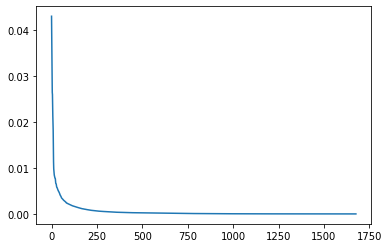

<Figure size 432x288 with 0 Axes>

array([4.30932822e-02, 3.82346254e-02, 3.24221327e-02, ...,
       9.27267903e-20, 2.86986247e-20, 8.49865141e-33])

In [13]:
# Eboulis des valeurs propres
plt.figure()
var = pca.explained_variance_ratio_
plt.plot(var)
plt.show()

# Diagrammes boîte des composantes principales
plt.figure()
# A compléter
plt.show()
pca.explained_variance_ratio_

In [14]:
sum(var)

0.9999999999999983

[[-3.11562351e-02 -1.63143208e+00 -1.05621962e+00 ... -2.17274115e-15
  -1.05471187e-15  8.89999879e-15]
 [-1.38999527e-01 -1.58863245e+00 -9.21111339e-01 ...  1.36002321e-15
   3.60822483e-16  8.77076189e-15]
 [ 2.31905178e-02 -1.42207859e+00 -9.11956189e-01 ... -1.60274912e-08
  -2.47803374e-08  8.49320614e-15]
 ...
 [ 5.56222130e-01 -1.36802020e+00 -5.85274038e-01 ... -8.53483950e-16
  -5.55111512e-16  9.15933995e-15]
 [ 3.96659639e-01 -4.05030823e-01 -7.52385114e-01 ... -1.06165077e-15
   1.36696210e-15  8.20177259e-15]
 [-3.94040961e-02 -1.84521725e+00 -1.23208234e+00 ... -6.60409227e-15
   8.84275292e-15  8.90823873e-15]]


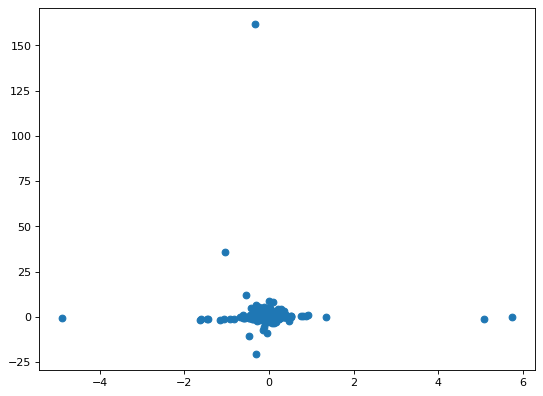

In [31]:
print(C)
fig = plt.figure(figsize=(8,6), dpi=80)
# limites de l'axe (O,x) des abscisses
#xlim(-4.0,4.0)
 
# graduations de l'axe (O,x) des abscisses
#xticks(np.linspace(-4,4,9,endpoint=True))
 
# limites de l'axe (O,y) des ordonnées
#ylim(-1.0,1.0)
 
# graduations de l'axe (O,y) des ordonnées
#yticks(np.linspace(-1,1,5,endpoint=True))

plt.scatter(C[[0]],C[[1]])